In [381]:
import numpy as np
import sklearn
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import  metrics

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

DataImport

In [382]:
import os

TITANIC_PATH = os.path.join("data", "bank")

In [383]:
import pandas as pd


def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path,sep=';')

In [384]:
full_data = load_titanic_data("bank-full.csv")

In [385]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [386]:
full_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [387]:
full_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [388]:
full_data.columns = full_data.columns.str.replace('"', '')
full_data=full_data.rename({'index,age': 'age'}, axis=1)
full_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [389]:
# full_data['age']=full_data['age'].str.replace('"', '')
# full_data['job']=full_data['job'].str.replace('"', '')
# full_data['marital']=full_data['marital'].str.replace('"', '')
# full_data['education']=full_data['education'].str.replace('"', '')
# full_data['default']=full_data['default'].str.replace('"', '')
#
# full_data['housing']=full_data['housing'].str.replace('"', '')
# full_data['loan']=full_data['loan'].str.replace('"', '')
# full_data['contact']=full_data['contact'].str.replace('"', '')
#
# full_data['month']=full_data['month'].str.replace('"', '')
#
# full_data['poutcome']=full_data['poutcome'].str.replace('"', '')
# full_data['y']=full_data['y'].str.replace('"', '')
# full_data.head(20)

In [390]:

# full_data['age']=full_data['age'].str.split(',')
# full_data['age']=full_data['age'].apply(lambda x:x[1])
# full_data = full_data.astype({"age": 'int64'}, errors='raise')
# full_data.head()

In [391]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
full_data['y'] = label_encoder.fit_transform(full_data['y'])

Data Inspections

In [392]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int32 
dtypes: int32(1), int64(7), object(9)
memory usage: 5.7+ MB


In [393]:
def dis(name):
    print(full_data[[name, 'y']].groupby([name]).mean().sort_values(by='y', ascending=False))
    print('--')
    print(full_data[name].value_counts(normalize=True))
    print('----')
to_dsplay=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'previous', 'poutcome']

for n in to_dsplay:
    dis(n)

                      y
job                    
student        0.286780
retired        0.227915
unemployed     0.155027
management     0.137556
admin.         0.122027
self-employed  0.118429
unknown        0.118056
technician     0.110570
services       0.088830
housemaid      0.087903
entrepreneur   0.082717
blue-collar    0.072750
--
blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64
----
                 y
marital           
single    0.149492
divorced  0.119455
married   0.101235
--
married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64
----
                  y
education          
tertiary   0.150064
unknown    0.135703
secondary  0.105594
primary    0.086265
--

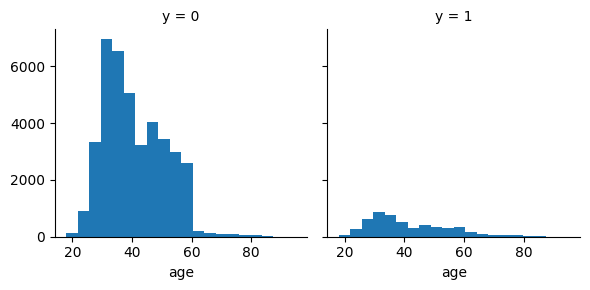

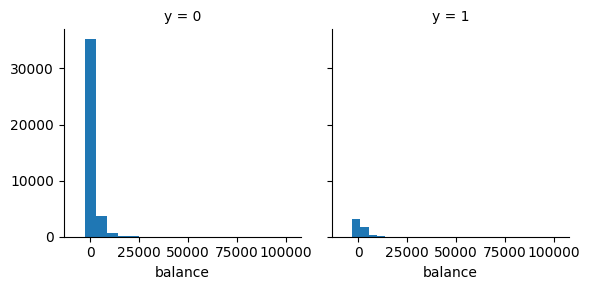

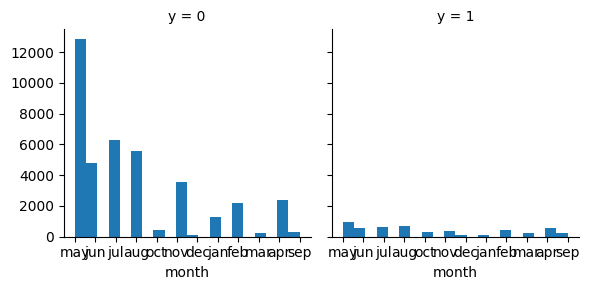

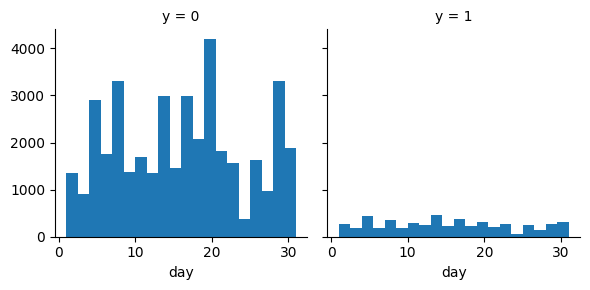

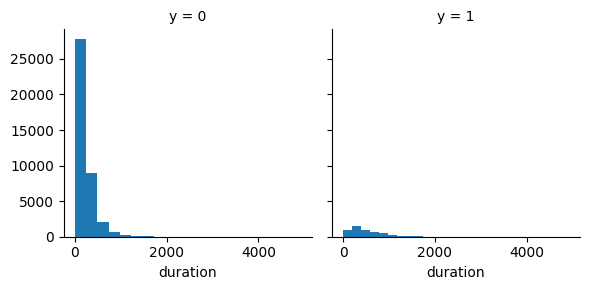

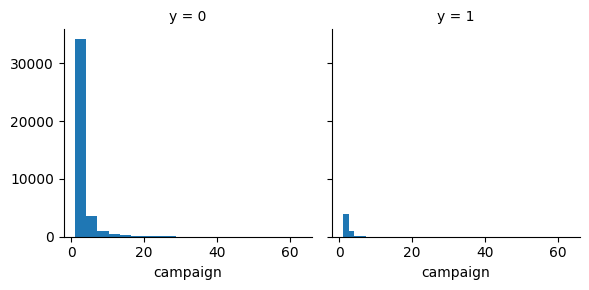

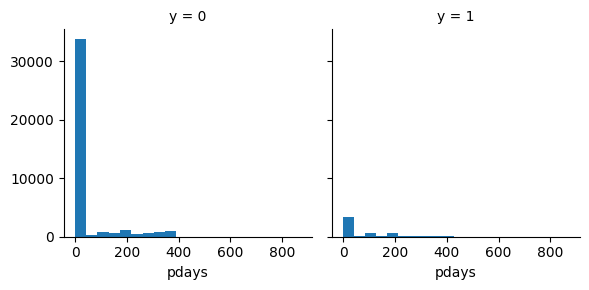

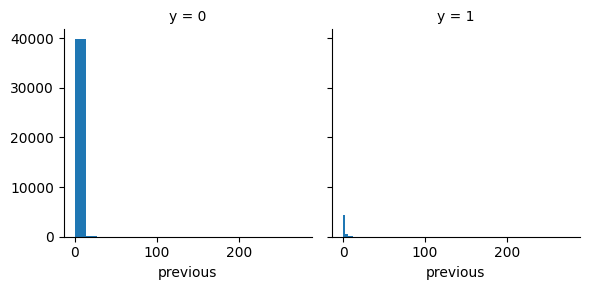

In [394]:
ret=['age', 'balance','month', 'day', 'duration', 'campaign', 'pdays', 'previous']
def sss(name):
    g = sns.FacetGrid(full_data, col='y')
    g.map(plt.hist, name, bins=20)

for a in ret:
    sss(a)

In [395]:
# full_data['balance'] = np.where(full_data['balance'] > 60000, full_data['balance'].mean(), full_data['balance'])
# full_data['duration'] = np.where(full_data['duration'] > 2000, full_data['duration'].mean(), full_data['duration'])
# full_data['campaign'] = np.where(full_data['campaign'] > 35, full_data['campaign'].mean(), full_data['campaign'])
# full_data['pdays'] = np.where(full_data['pdays'] > 350, full_data['pdays'].mean(), full_data['pdays'])
# full_data['previous'] = np.where(full_data['previous'] > 30, full_data['previous'].mean(), full_data['previous'])

full_data['age'] = np.where(full_data['age'] > 65, full_data['age'].mean(), full_data['age'])
full_data['balance'] = np.where(full_data['balance'] > 6000, full_data['balance'].mean(), full_data['balance'])
full_data['duration'] = np.where(full_data['duration'] > 2000, full_data['duration'].mean(), full_data['duration'])
full_data['campaign'] = np.where(full_data['campaign'] > 10, full_data['campaign'].mean(), full_data['campaign'])
full_data['pdays'] = np.where(full_data['pdays'] > 35, full_data['pdays'].mean(), full_data['pdays'])
full_data['previous'] = np.where(full_data['previous'] > 5, full_data['previous'].mean(), full_data['previous'])




age: 
              range  population      sway
0   (17.953, 20.35]    0.002145  0.340206
1     (20.35, 22.7]    0.004601  0.298077
2     (22.7, 25.05]    0.022804  0.218235
3     (25.05, 27.4]    0.037911  0.160443
4     (27.4, 29.75]    0.049169  0.149798
5     (29.75, 32.1]    0.129128  0.110312
6     (32.1, 34.45]    0.086306  0.104562
7     (34.45, 36.8]    0.081838  0.109189
8     (36.8, 39.15]    0.102829  0.098301
9     (39.15, 41.5]    0.075137  0.163674
10    (41.5, 43.85]    0.053151  0.089055
11    (43.85, 46.2]    0.078012  0.089878
12    (46.2, 48.55]    0.046117  0.093525
13    (48.55, 50.9]    0.042755  0.089498
14    (50.9, 53.25]    0.060560  0.090212
15    (53.25, 55.6]    0.035766  0.098949
16    (55.6, 57.95]    0.035522  0.090909
17    (57.95, 60.3]    0.046582  0.122507
18    (60.3, 62.65]    0.005021  0.422907
19    (62.65, 65.0]    0.004645  0.409524
----


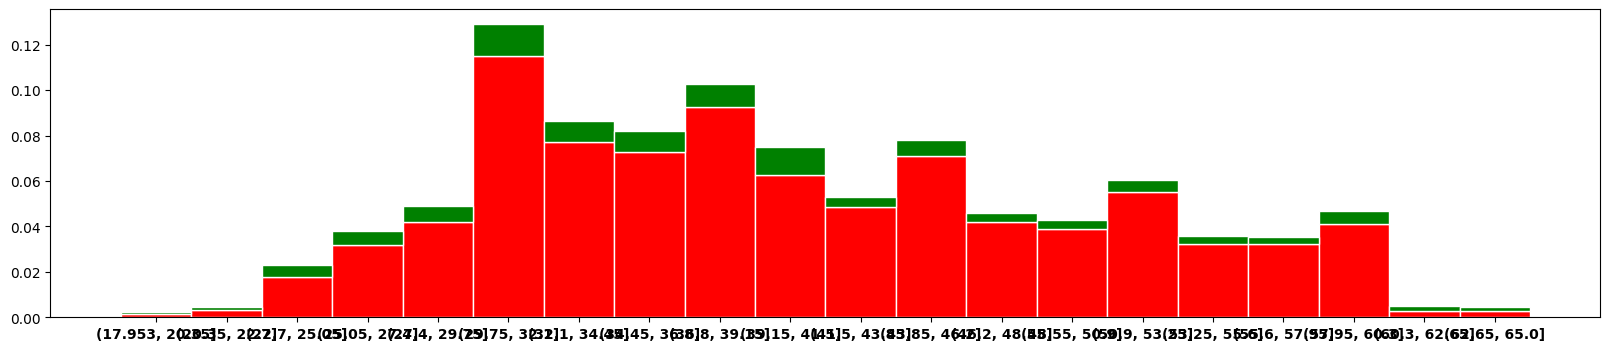

balance: 
                    range  population      sway
0   (-8033.019, -7318.05]    0.000022  0.000000
1     (-7318.05, -6617.1]    0.000022  0.000000
2     (-6617.1, -5916.15]    0.000000       NaN
3     (-5916.15, -5215.2]    0.000000       NaN
4     (-5215.2, -4514.25]    0.000000       NaN
5     (-4514.25, -3813.3]    0.000022  0.000000
6     (-3813.3, -3112.35]    0.000044  0.000000
7     (-3112.35, -2411.4]    0.000088  0.250000
8     (-2411.4, -1710.45]    0.000464  0.047619
9     (-1710.45, -1009.5]    0.002411  0.027523
10     (-1009.5, -308.55]    0.028334  0.058548
11       (-308.55, 392.4]    0.441043  0.091825
12       (392.4, 1093.35]    0.221627  0.122854
13      (1093.35, 1794.3]    0.145274  0.141748
14      (1794.3, 2495.25]    0.054920  0.153041
15      (2495.25, 3196.2]    0.037203  0.173603
16      (3196.2, 3897.15]    0.025923  0.188567
17      (3897.15, 4598.1]    0.017341  0.165816
18      (4598.1, 5299.05]    0.014797  0.165919
19      (5299.05, 6000.0]    0

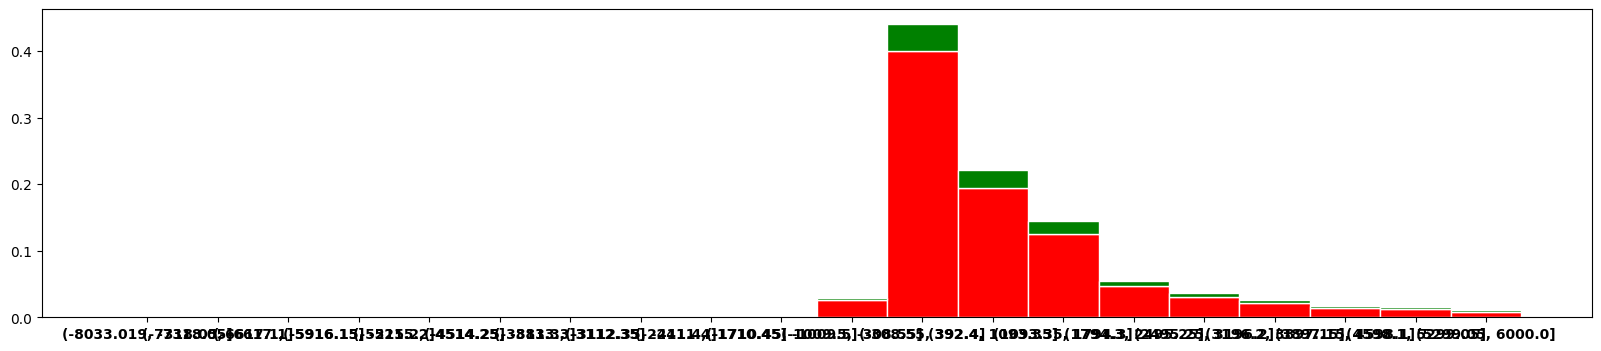

day: 
           range  population      sway
0    (0.97, 2.5]    0.035721  0.168421
1     (2.5, 4.0]    0.055827  0.161648
2     (4.0, 5.5]    0.042246  0.112565
3     (5.5, 7.0]    0.082922  0.090157
4     (7.0, 8.5]    0.040742  0.109121
5    (8.5, 10.0]    0.046117  0.143885
6   (10.0, 11.5]    0.032713  0.122380
7   (11.5, 13.0]    0.070514  0.152133
8   (13.0, 14.5]    0.040875  0.113636
9   (14.5, 16.0]    0.068966  0.137909
10  (16.0, 17.5]    0.042888  0.090768
11  (17.5, 19.0]    0.089912  0.086101
12  (19.0, 20.5]    0.060870  0.069767
13  (20.5, 22.0]    0.064829  0.121119
14  (22.0, 23.5]    0.020769  0.134185
15  (23.5, 25.0]    0.028467  0.151515
16  (25.0, 26.5]    0.022893  0.112077
17  (26.5, 28.0]    0.065272  0.099288
18  (28.0, 29.5]    0.038597  0.073926
19  (29.5, 31.0]    0.048860  0.143504
----


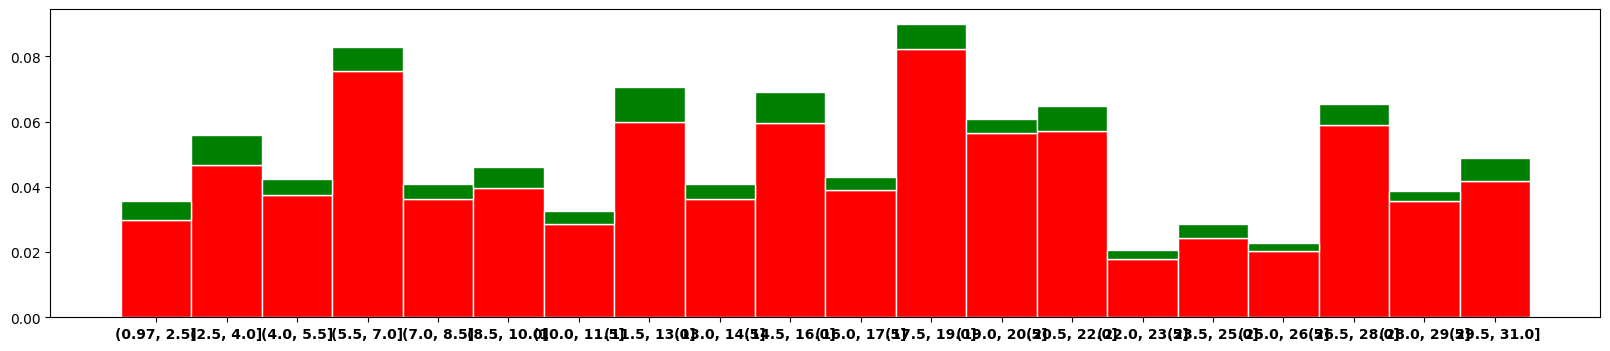

duration: 
               range  population      sway
0     (-1.994, 99.7]    0.237199  0.010537
1      (99.7, 199.4]    0.310278  0.054391
2     (199.4, 299.1]    0.181128  0.119184
3     (299.1, 398.8]    0.096990  0.151197
4     (398.8, 498.5]    0.056115  0.204572
5     (498.5, 598.2]    0.035213  0.280779
6     (598.2, 697.9]    0.024574  0.367237
7     (697.9, 797.6]    0.016677  0.424403
8     (797.6, 897.3]    0.011502  0.509615
9     (897.3, 997.0]    0.008029  0.567493
10   (997.0, 1096.7]    0.006149  0.604317
11  (1096.7, 1196.4]    0.004910  0.549550
12  (1196.4, 1296.1]    0.003185  0.597222
13  (1296.1, 1395.8]    0.002322  0.676190
14  (1395.8, 1495.5]    0.001969  0.584270
15  (1495.5, 1595.2]    0.001349  0.655738
16  (1595.2, 1694.9]    0.000730  0.818182
17  (1694.9, 1794.6]    0.000619  0.642857
18  (1794.6, 1894.3]    0.000619  0.500000
19  (1894.3, 1994.0]    0.000442  0.550000
----


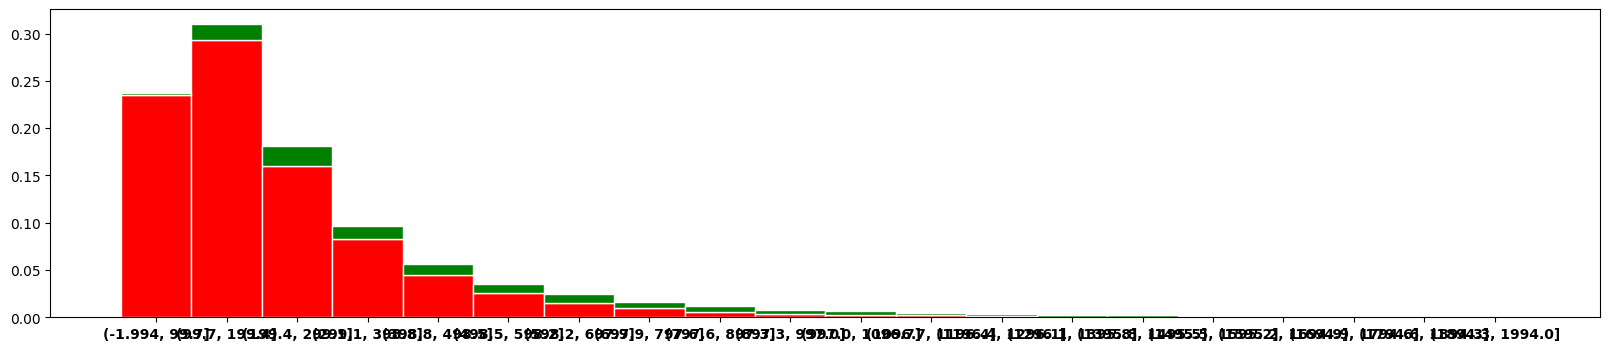

campaign: 
            range  population      sway
0   (0.991, 1.45]    0.388047  0.145976
1     (1.45, 1.9]    0.000000       NaN
2     (1.9, 2.35]    0.276592  0.112035
3     (2.35, 2.8]    0.026454  0.039298
4     (2.8, 3.25]    0.122116  0.111936
5     (3.25, 3.7]    0.000000       NaN
6     (3.7, 4.15]    0.077901  0.090006
7     (4.15, 4.6]    0.000000       NaN
8     (4.6, 5.05]    0.039017  0.078798
9     (5.05, 5.5]    0.000000       NaN
10    (5.5, 5.95]    0.000000       NaN
11    (5.95, 6.4]    0.028555  0.071263
12    (6.4, 6.85]    0.000000       NaN
13    (6.85, 7.3]    0.016257  0.063946
14    (7.3, 7.75]    0.000000       NaN
15    (7.75, 8.2]    0.011944  0.059259
16    (8.2, 8.65]    0.000000       NaN
17    (8.65, 9.1]    0.007233  0.064220
18    (9.1, 9.55]    0.000000       NaN
19   (9.55, 10.0]    0.005884  0.052632
----


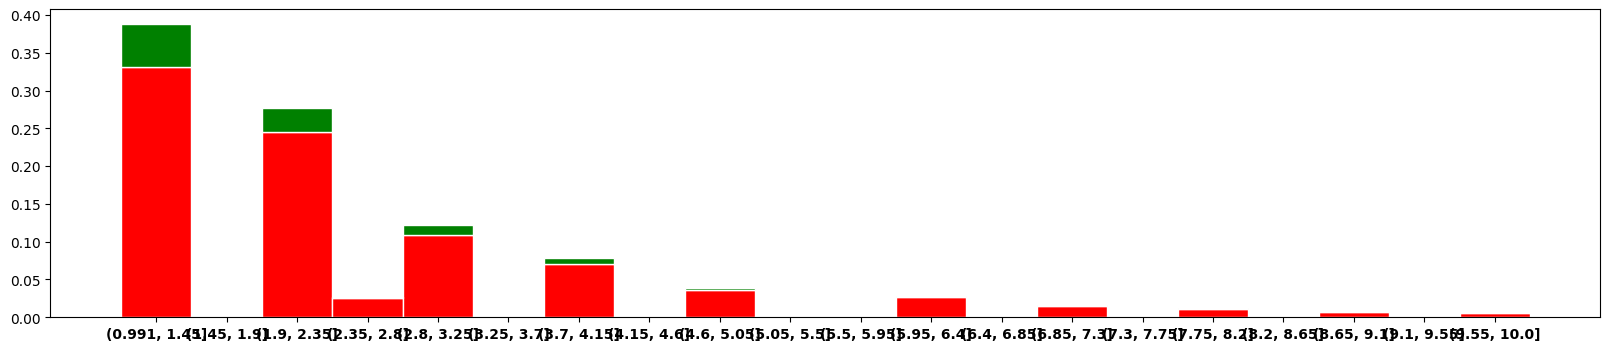

pdays: 
               range  population      sway
0     (-1.041, 1.06]    0.817699  0.091698
1       (1.06, 3.12]    0.000841  0.052632
2       (3.12, 5.18]    0.000288  0.076923
3       (5.18, 7.24]    0.000376  0.058824
4      (7.24, 9.299]    0.000818  0.081081
5    (9.299, 11.359]    0.000133  0.666667
6   (11.359, 13.419]    0.000288  0.230769
7   (13.419, 15.479]    0.000265  0.083333
8   (15.479, 17.539]    0.000088  0.250000
9   (17.539, 19.599]    0.000066  0.000000
10  (19.599, 21.659]    0.000133  0.333333
11  (21.659, 23.719]    0.000066  0.333333
12  (23.719, 25.779]    0.000066  0.000000
13  (25.779, 27.838]    0.000111  0.200000
14  (27.838, 29.898]    0.000265  0.166667
15  (29.898, 31.958]    0.000133  0.166667
16  (31.958, 34.018]    0.000111  0.400000
17  (34.018, 36.078]    0.000177  0.375000
18  (36.078, 38.138]    0.000000       NaN
19  (38.138, 40.198]    0.178076  0.232393
----


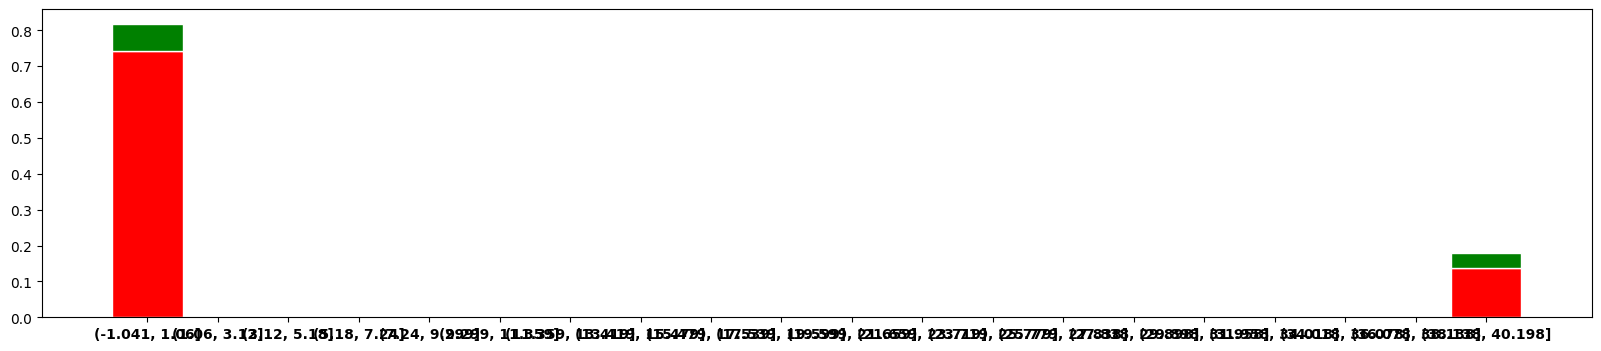

previous: 
             range  population      sway
0   (-0.005, 0.25]    0.817367  0.091573
1      (0.25, 0.5]    0.000000       NaN
2      (0.5, 0.75]    0.023534  0.263158
3      (0.75, 1.0]    0.061313  0.210317
4      (1.0, 1.25]    0.000000       NaN
5      (1.25, 1.5]    0.000000       NaN
6      (1.5, 1.75]    0.000000       NaN
7      (1.75, 2.0]    0.046582  0.216524
8      (2.0, 2.25]    0.000000       NaN
9      (2.25, 2.5]    0.000000       NaN
10     (2.5, 2.75]    0.000000       NaN
11     (2.75, 3.0]    0.025259  0.257443
12     (3.0, 3.25]    0.000000       NaN
13     (3.25, 3.5]    0.000000       NaN
14     (3.5, 3.75]    0.000000       NaN
15     (3.75, 4.0]    0.015793  0.239496
16     (4.0, 4.25]    0.000000       NaN
17     (4.25, 4.5]    0.000000       NaN
18     (4.5, 4.75]    0.000000       NaN
19     (4.75, 5.0]    0.010152  0.263617
----


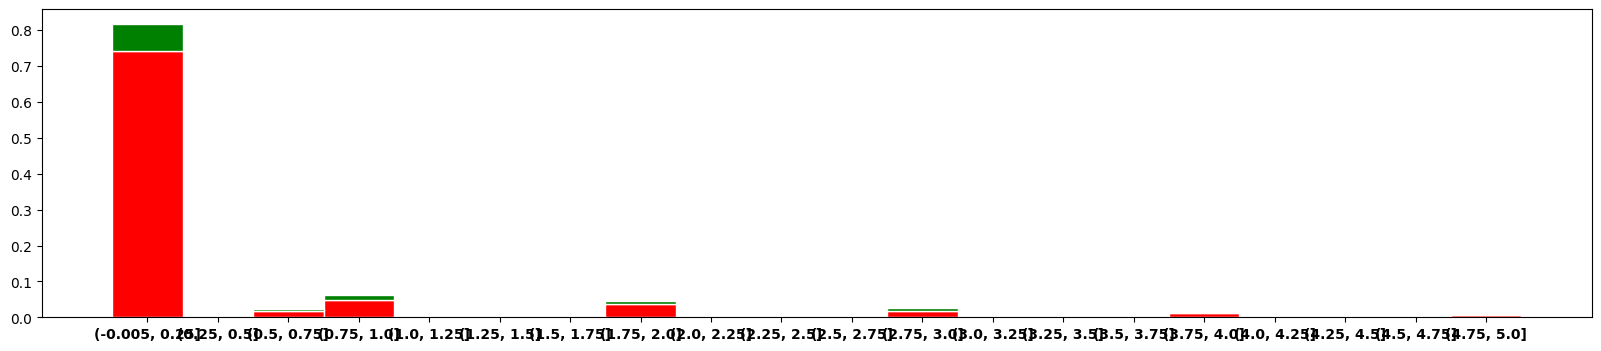

In [396]:
def dis2(name):
    print(name+": ")
    new_name=name+"_band"
    full_data[new_name] = pd.cut(full_data[name], 20)
    bars1= pd.DataFrame()
    bars4=full_data[[new_name, 'y']].groupby([new_name], as_index=False).mean().sort_values(by=new_name, ascending=True)[new_name]
    bars5=full_data[[new_name, 'y']].groupby([new_name], as_index=False).mean().sort_values(by=new_name, ascending=True)['y']
    bars6=full_data[new_name].value_counts(normalize=True,sort=False)

    bars6=bars6.set_axis(range(20))

    dataa = {'range': bars4,
        'sway': bars5,
        'population': bars6}
    dfd = pd.DataFrame(dataa)


    print(dfd[['range','population','sway']])
    print('----')

    f = plt.figure()
    f.set_figwidth(20)
    f.set_figheight(4)

    plt.bar(range(20), dfd['population']*(1-dfd['sway']), color='red', edgecolor='white', width=1)
    plt.bar(range(20), dfd['population']*dfd['sway'], bottom=dfd['population']*(1-dfd['sway']), color='green', edgecolor='white', width=1)
    plt.xticks(range(20),  dfd['range'], fontweight='bold')

    plt.show()
    plt.close()

to_dsplay_2=['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

for n in to_dsplay_2:
    dis2(n)

In [397]:
full_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,previous,poutcome,y,age_band,balance_band,day_band,duration_band,campaign_band,pdays_band,previous_band
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,...,0.0,unknown,0,"(57.95, 60.3]","(1794.3, 2495.25]","(4.0, 5.5]","(199.4, 299.1]","(0.991, 1.45]","(-1.041, 1.06]","(-0.005, 0.25]"
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,...,0.0,unknown,0,"(43.85, 46.2]","(-308.55, 392.4]","(4.0, 5.5]","(99.7, 199.4]","(0.991, 1.45]","(-1.041, 1.06]","(-0.005, 0.25]"
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,...,0.0,unknown,0,"(32.1, 34.45]","(-308.55, 392.4]","(4.0, 5.5]","(-1.994, 99.7]","(0.991, 1.45]","(-1.041, 1.06]","(-0.005, 0.25]"
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,...,0.0,unknown,0,"(46.2, 48.55]","(1093.35, 1794.3]","(4.0, 5.5]","(-1.994, 99.7]","(0.991, 1.45]","(-1.041, 1.06]","(-0.005, 0.25]"
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,...,0.0,unknown,0,"(32.1, 34.45]","(-308.55, 392.4]","(4.0, 5.5]","(99.7, 199.4]","(0.991, 1.45]","(-1.041, 1.06]","(-0.005, 0.25]"


In [398]:
full_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,previous,poutcome,y,age_band,balance_band,day_band,duration_band,campaign_band,pdays_band,previous_band
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,...,0.0,unknown,0,"(57.95, 60.3]","(1794.3, 2495.25]","(4.0, 5.5]","(199.4, 299.1]","(0.991, 1.45]","(-1.041, 1.06]","(-0.005, 0.25]"
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,...,0.0,unknown,0,"(43.85, 46.2]","(-308.55, 392.4]","(4.0, 5.5]","(99.7, 199.4]","(0.991, 1.45]","(-1.041, 1.06]","(-0.005, 0.25]"
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,...,0.0,unknown,0,"(32.1, 34.45]","(-308.55, 392.4]","(4.0, 5.5]","(-1.994, 99.7]","(0.991, 1.45]","(-1.041, 1.06]","(-0.005, 0.25]"
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,...,0.0,unknown,0,"(46.2, 48.55]","(1093.35, 1794.3]","(4.0, 5.5]","(-1.994, 99.7]","(0.991, 1.45]","(-1.041, 1.06]","(-0.005, 0.25]"
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,...,0.0,unknown,0,"(32.1, 34.45]","(-308.55, 392.4]","(4.0, 5.5]","(99.7, 199.4]","(0.991, 1.45]","(-1.041, 1.06]","(-0.005, 0.25]"


In [399]:
full_data['y'].value_counts(normalize=True)

0    0.883015
1    0.116985
Name: y, dtype: float64

In [400]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            45211 non-null  float64 
 1   job            45211 non-null  object  
 2   marital        45211 non-null  object  
 3   education      45211 non-null  object  
 4   default        45211 non-null  object  
 5   balance        45211 non-null  float64 
 6   housing        45211 non-null  object  
 7   loan           45211 non-null  object  
 8   contact        45211 non-null  object  
 9   day            45211 non-null  int64   
 10  month          45211 non-null  object  
 11  duration       45211 non-null  float64 
 12  campaign       45211 non-null  float64 
 13  pdays          45211 non-null  float64 
 14  previous       45211 non-null  float64 
 15  poutcome       45211 non-null  object  
 16  y              45211 non-null  int32   
 17  age_band       45211 non-null  

In [401]:
full_data['loan'].value_counts(normalize=True)

no     0.839774
yes    0.160226
Name: loan, dtype: float64

   Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   # related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone")
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   # other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   # social and economic context attributes
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  20 - nr.employed: number of employees - quarterly indicator (numeric)

   Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric)
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [402]:
# full_data[ 'loan' ].replace({'unknown':None},inplace=True)
# full_data[ 'loan' ].replace({'unknown':None},inplace=True)
# full_data[ 'loan' ].replace({'unknown':None},inplace=True)
# full_data[ 'loan' ].replace({'unknown':None},inplace=True)
# full_data[ 'loan' ].replace({'unknown':None},inplace=True)
# full_data[ 'loan' ].replace({'unknown':None},inplace=True)
# full_data[ 'loan' ].replace({'unknown':None},inplace=True)
# full_data[ 'loan' ].replace({'unknown':None},inplace=True)

In [403]:
# full_data['loan'].value_counts(normalize=True)

In [404]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            45211 non-null  float64 
 1   job            45211 non-null  object  
 2   marital        45211 non-null  object  
 3   education      45211 non-null  object  
 4   default        45211 non-null  object  
 5   balance        45211 non-null  float64 
 6   housing        45211 non-null  object  
 7   loan           45211 non-null  object  
 8   contact        45211 non-null  object  
 9   day            45211 non-null  int64   
 10  month          45211 non-null  object  
 11  duration       45211 non-null  float64 
 12  campaign       45211 non-null  float64 
 13  pdays          45211 non-null  float64 
 14  previous       45211 non-null  float64 
 15  poutcome       45211 non-null  object  
 16  y              45211 non-null  int32   
 17  age_band       45211 non-null  

In [405]:
from sklearn.preprocessing import LabelEncoder

# full_data[ 'y' == 'no'] = 0
# full_data[ 'y' == 'yes'] = 1
#
# full_data[ 'default' == 'no'] = 0
# full_data[ 'default' == 'yes'] = 1
#
# full_data[ 'housing' == 'no'] = 0
# full_data[ 'housing' == 'yes'] = 1
#
# full_data[ 'loan' == 'no'] = 0
# full_data[ 'loan' == 'yes'] = 1
label_encoder = LabelEncoder()
full_data['y'] = label_encoder.fit_transform(full_data['y'])
# full_data['default'] = label_encoder.fit_transform(full_data['default'])
# full_data['housing'] = label_encoder.fit_transform(full_data['housing'])
# full_data['loan'] = label_encoder.fit_transform(full_data['loan'])
# full_data['loan'] = label_encoder.fit_transform(full_data['loan'])
# full_data['loan'] = label_encoder.fit_transform(full_data['loan'])
# full_data['loan'] = label_encoder.fit_transform(full_data['loan'])
# full_data['loan'] = label_encoder.fit_transform(full_data['loan'])
full_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,previous,poutcome,y,age_band,balance_band,day_band,duration_band,campaign_band,pdays_band,previous_band
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,...,0.0,unknown,0,"(57.95, 60.3]","(1794.3, 2495.25]","(4.0, 5.5]","(199.4, 299.1]","(0.991, 1.45]","(-1.041, 1.06]","(-0.005, 0.25]"
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,...,0.0,unknown,0,"(43.85, 46.2]","(-308.55, 392.4]","(4.0, 5.5]","(99.7, 199.4]","(0.991, 1.45]","(-1.041, 1.06]","(-0.005, 0.25]"
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,...,0.0,unknown,0,"(32.1, 34.45]","(-308.55, 392.4]","(4.0, 5.5]","(-1.994, 99.7]","(0.991, 1.45]","(-1.041, 1.06]","(-0.005, 0.25]"
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,...,0.0,unknown,0,"(46.2, 48.55]","(1093.35, 1794.3]","(4.0, 5.5]","(-1.994, 99.7]","(0.991, 1.45]","(-1.041, 1.06]","(-0.005, 0.25]"
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,...,0.0,unknown,0,"(32.1, 34.45]","(-308.55, 392.4]","(4.0, 5.5]","(99.7, 199.4]","(0.991, 1.45]","(-1.041, 1.06]","(-0.005, 0.25]"


In [406]:
full_data['y'].value_counts(normalize=True)

0    0.883015
1    0.116985
Name: y, dtype: float64

In [407]:
full_data.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,poutcome
count,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959


In [408]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            45211 non-null  float64 
 1   job            45211 non-null  object  
 2   marital        45211 non-null  object  
 3   education      45211 non-null  object  
 4   default        45211 non-null  object  
 5   balance        45211 non-null  float64 
 6   housing        45211 non-null  object  
 7   loan           45211 non-null  object  
 8   contact        45211 non-null  object  
 9   day            45211 non-null  int64   
 10  month          45211 non-null  object  
 11  duration       45211 non-null  float64 
 12  campaign       45211 non-null  float64 
 13  pdays          45211 non-null  float64 
 14  previous       45211 non-null  float64 
 15  poutcome       45211 non-null  object  
 16  y              45211 non-null  int64   
 17  age_band       45211 non-null  

In [409]:
full_data.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.391743,896.535721,15.806419,255.154379,2.391996,6.395229,0.357844,0.116985
std,9.698391,1225.680016,8.322476,242.792228,1.749001,15.773364,0.928093,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1362.272058,21.000000,318.000000,3.000000,-1.000000,0.000000,0.000000
max,65.000000,6000.000000,31.000000,1994.000000,10.000000,40.197828,5.000000,1.000000


In [410]:
# dupa

train test split

In [411]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split

stratified_sample, _ = train_test_split(full_data, test_size=1-0.1, stratify=full_data['y'],random_state=62)
print(stratified_sample.shape)
cut_data=full_data.sample(frac=0.1, random_state=62)
print(cut_data.shape)
X = cut_data.drop(['y'], axis=1)
y = cut_data['y'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=62)
print("X.shape: {} y.shape: {}".format(X_train.shape, y_train.shape))
print("X.shape: {} y.shape: {}".format(X_test.shape, y_test.shape))

(4521, 24)
(4521, 24)
X.shape: (3616, 23) y.shape: (3616,)
X.shape: (905, 23) y.shape: (905,)


pipeline definition

In [412]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [413]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["balance","day","duration","campaign","pdays","previous"])),
        ("scaler", StandardScaler()),
        ("imputer", SimpleImputer(strategy="median")),
    ])

In [414]:
num_pipeline.fit_transform(X_train)

array([[-0.64405606, -1.05001539, -0.58874665, -0.2278654 , -0.46632135,
        -0.38465622],
       [ 0.36958517,  0.52715497, -1.00113237,  0.34471278, -0.46632135,
        -0.38465622],
       [ 1.58139749, -1.65661938, -0.91365661, -0.80044358, -0.46632135,
        -0.38465622],
       ...,
       [ 0.66728471,  0.04187178, -0.37630553, -0.80044358, -0.46632135,
        -0.38465622],
       [ 0.03318511, -0.44341141,  0.12772146,  0.34471278,  2.15550674,
         0.23922359],
       [ 1.79629133, -0.32209061, -0.15553337, -0.2278654 , -0.46632135,
        -0.38465622]])

In [415]:
# Inspired from stackoverflow.com/questions/25239958
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [416]:
# from future_encoders import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["age", "job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"])),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False, handle_unknown = 'ignore')),
        ("scaler", StandardScaler())
    ])

In [417]:
cat_pipeline.fit_transform(X_train)

array([[-0.01663205, -0.03721099, -0.02352453, ..., -0.20947532,
        -0.18526992,  0.47076706],
       [-0.01663205, -0.03721099, -0.02352453, ..., -0.20947532,
        -0.18526992,  0.47076706],
       [-0.01663205, -0.03721099, -0.02352453, ..., -0.20947532,
        -0.18526992,  0.47076706],
       ...,
       [-0.01663205, -0.03721099, -0.02352453, ..., -0.20947532,
        -0.18526992,  0.47076706],
       [-0.01663205, -0.03721099, -0.02352453, ..., -0.20947532,
        -0.18526992, -2.12419282],
       [-0.01663205, -0.03721099, -0.02352453, ..., -0.20947532,
        -0.18526992,  0.47076706]])

In [418]:
from sklearn.pipeline import FeatureUnion

preprocess_pipeline = FeatureUnion(transformer_list=[

        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

model learing

In [419]:
from sklearn.model_selection import StratifiedKFold
models = []
seed=123
kfold = StratifiedKFold(n_splits=5)

In [420]:
def print_model_stats(model):
    print("precision_score: {}".format(metrics.precision_score(y_test, model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test, model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test, model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model.predict(X_test)) ))

In [421]:
from sklearn.base import ClassifierMixin

class CustomClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self):
        pass

    def fit(self, X, y=None):
        pass

    def predict(self, X, y=None):
        return np.zeros((len(X)))

    def predict_proba(self, X, y=None):
        pass

In [422]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', CustomClassifier())])


param_grid = {

}

grid_44 = GridSearchCV(pipe, param_grid, cv=kfold)

grid_44.fit(X_train, y_train)
models.append(('log', grid_44.best_estimator_))
print(grid_44.best_params_)
print_model_stats(grid_44.best_estimator_)

{}
precision_score: 0.0
recall_score: 0.0
f1_score: 0.0


C:\Users\wojte\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy_score: 0.8806629834254144


In [423]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', LogisticRegression(max_iter=1000))])


param_grid = {
            'classifier__C': [ 0.01, 0.1, 1, 10, 100],
            'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none']
}

grid_4 = GridSearchCV(pipe, param_grid, cv=kfold)

grid_4.fit(X_train, y_train)

models.append(('log', grid_4.best_estimator_))
print(grid_4.best_params_)
print_model_stats(grid_4.best_estimator_)

C:\Users\wojte\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\wojte\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\wojte\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\wojte\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\wojte\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C a

{'classifier__C': 0.01, 'classifier__penalty': 'l2'}
precision_score: 0.6111111111111112
recall_score: 0.2037037037037037
f1_score: 0.3055555555555555
accuracy_score: 0.8895027624309392


resoult comarison

garbage

In [424]:
precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test, model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test, model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test, model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model.predict(X_test)) ))
    precision_score.append(metrics.precision_score(y_test, model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test, model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test, model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))

log
precision_score: 0.0
recall_score: 0.0
f1_score: 0.0
accuracy_score: 0.8806629834254144
log
precision_score: 0.6111111111111112
recall_score: 0.2037037037037037
f1_score: 0.3055555555555555
accuracy_score: 0.8895027624309392


C:\Users\wojte\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wojte\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
